In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('house_price_prediction.csv')

In [3]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [4]:
df['date']=pd.to_datetime(df['date']).dt.year
df.drop(columns=['street','statezip','country','city'],inplace=True)
df.rename(columns={'date':'year'},inplace=True)

In [5]:
df.head()

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,2014,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2014,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,2014,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,2014,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,2014,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


[]

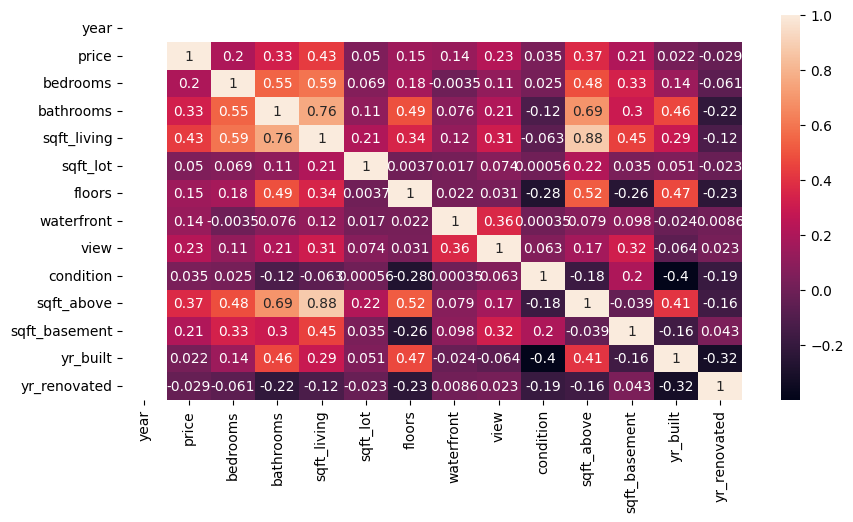

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df.corr(),annot=True)
plt.plot()

In [8]:
x=df.drop(columns='price')
y=df['price']

In [12]:
scale=StandardScaler()
scale.fit(x)
x=pd.DataFrame(scale.transform(x),columns=x.columns)
x.head()

,year,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,0.0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670
1,0.0,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693
2,0.0,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693
3,0.0,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693
4,0.0,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396


In [19]:
x.drop(columns='year', inplace=True)

In [20]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [45]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
lr.score(x_test,y_test)

0.03209976569465178

In [50]:
mse=mean_squared_error(y_test,lr.predict(x_test))
mae=mean_absolute_error(y_test,lr.predict(x_test))
print('mse',mse)
print('mae',mae)

mse 987109511525.6152
mae 211148.89475760926


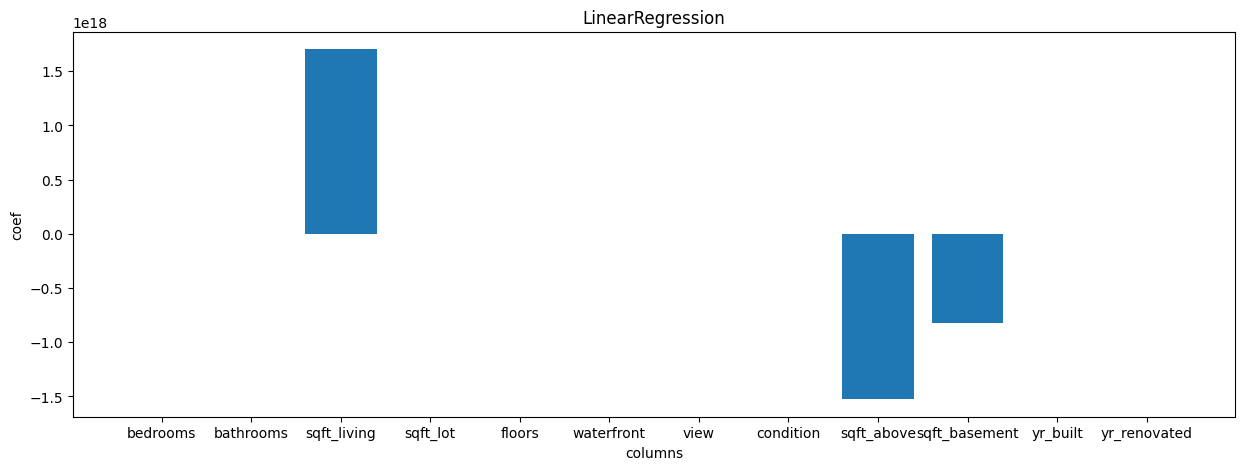

In [47]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title('LinearRegression')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

In [48]:
la=Lasso(alpha=0.01)
la.fit(x_train,y_train)
la.score(x_test,y_test)

C:\Users\abdul\anaconda3\envs\ml_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


0.032283851776121364

In [51]:
mse=mean_squared_error(y_test,la.predict(x_test))
mae=mean_absolute_error(y_test,la.predict(x_test))
print('mse',mse)
print('mae',mae)

mse 986921772009.1675
mae 210908.17447591986


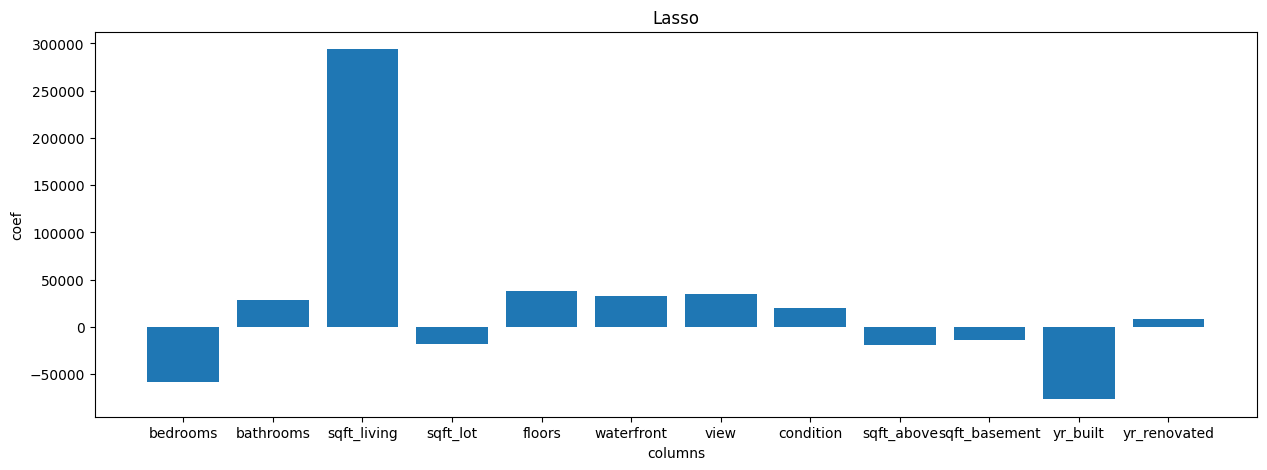

In [49]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title('Lasso')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

In [42]:
ri=Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)

0.03240199417134748

In [52]:
mse=mean_squared_error(y_test,ri.predict(x_test))
mae=mean_absolute_error(y_test,ri.predict(x_test))
print('mse',mse)
print('mae',mae)

mse 986801284919.7871
mae 210815.94787385667


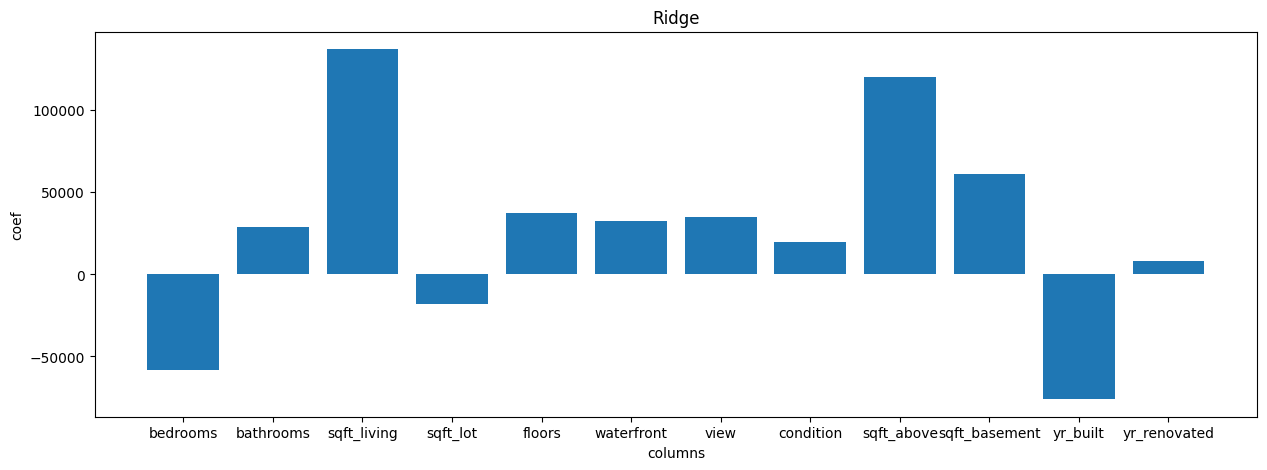

In [43]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title('Ridge')
plt.xlabel('columns')
plt.ylabel('coef')
plt.show()

In [53]:
pd.DataFrame({'col_name':x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,-5.764256e+04,-58612.012069,-58006.052993
1,bathrooms,2.807751e+04,28620.851521,28878.686087
2,sqft_living,1.702529e+18,293862.914857,137085.109644
3,sqft_lot,-1.849180e+04,-18457.444078,-18298.877275
4,floors,3.713658e+04,37581.763676,37445.130830
5,waterfront,3.225561e+04,32277.522911,32264.182806
6,view,3.512035e+04,34834.367544,34968.321859
7,condition,2.019242e+04,19864.724543,19870.905664
8,sqft_above,-1.523938e+18,-19147.129423,120223.632684
9,sqft_basement,-8.203919e+17,-13867.961864,61163.461025
